In [1]:
# Import Libraries
from tensorflow.keras.preprocessing.image import load_img
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator


In [2]:
# My data is in google drive.
train_dir = "C://Users//rajdi//Desktop//IMP Projects//Identification-of-medicinal-plants-using-image-processing-algorithms//Segmented Medicinal Leaf Images"
test_dir="C://Users//rajdi//Desktop//IMP Projects//Identification-of-medicinal-plants-using-image-processing-algorithms//Segmented Medicinal Leaf Images"


In [3]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count    

In [4]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) # For testing i took only few samples from unseen data. we can evaluate using validation data which is part of train data.
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

3 Classes
228 Train images
228 Test images


In [5]:
# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =512

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True, target_size=(img_width,img_height), batch_size=batch_size)

Found 228 images belonging to 3 classes.
Found 228 images belonging to 3 classes.


In [7]:
train_generator.class_indices

{'Alpinia Galanga (Rasna)': 0,
 'Amaranthus Viridis (Arive-Dantu)': 1,
 'Artocarpus Heterophyllus (Jackfruit)': 2}

In [8]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 84, 84, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 41, 41, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 19, 19, 64)       

In [9]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


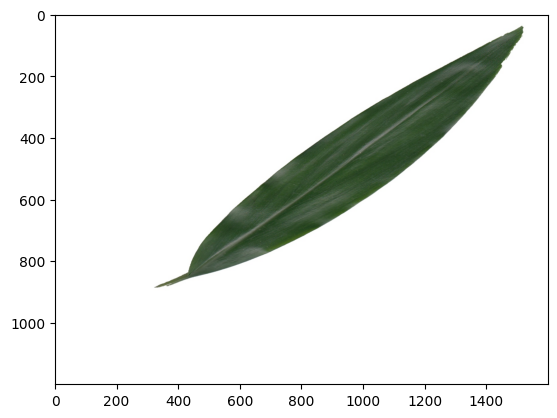

In [10]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

img1 = load_img(
    "C://Users//rajdi//Desktop//IMP Projects//Identification-of-medicinal-plants-using-image-processing-algorithms//Segmented Medicinal Leaf Images//Alpinia Galanga (Rasna)//AG-S-001.jpg")
plt.imshow(img1)

# Preprocess image
img1 = load_img(
    "C://Users//rajdi//Desktop//IMP Projects//Identification-of-medicinal-plants-using-image-processing-algorithms//Segmented Medicinal Leaf Images//Alpinia Galanga (Rasna)//AG-S-001.jpg", target_size=(256, 256))
img = img_to_array(img1)
img = img / 255
img = np.expand_dims(img, axis=0)
# "D:\Docs\Smart India Hackathon\Medicinal Leaf Dataset\Segmented Medicinal Leaf Images\Alpinia Galanga (Rasna)"


In [11]:

# Visualizing output after every layer.
from keras.models import Model
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_3_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_3_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten').output)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
conv2d_3_features = conv2d_3_output.predict(img)
max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
flatten_1_features = flatten_1_output.predict(img)

1/1 [==============================] - 0s 98ms/step


In [12]:
DATASET_DIR = "C://Users//rajdi//Desktop//IMP Projects//Identification-of-medicinal-plants-using-image-processing-algorithms//all_dataset"
DATASET_TRAIN_DIR = os.path.join(
    DATASET_DIR, "/")  # Update the directory path
DATASET_TEST_DIR = os.path.join(
    DATASET_DIR, "/")  # Update the directory path

# Define the number of classes in your dataset
num_classes = len(os.listdir(DATASET_DIR))
print (num_classes)

13


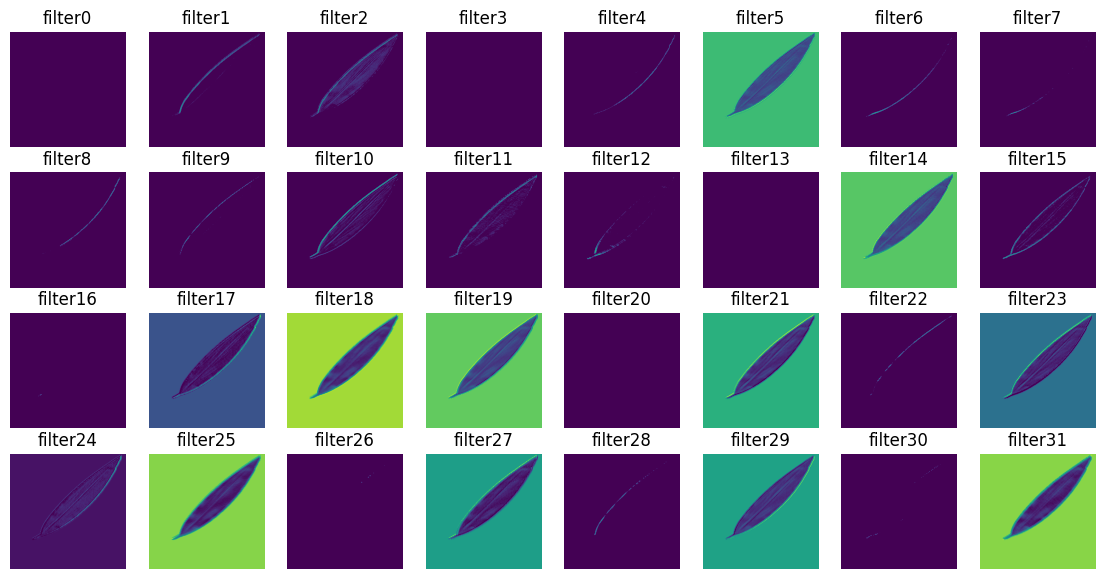

In [13]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

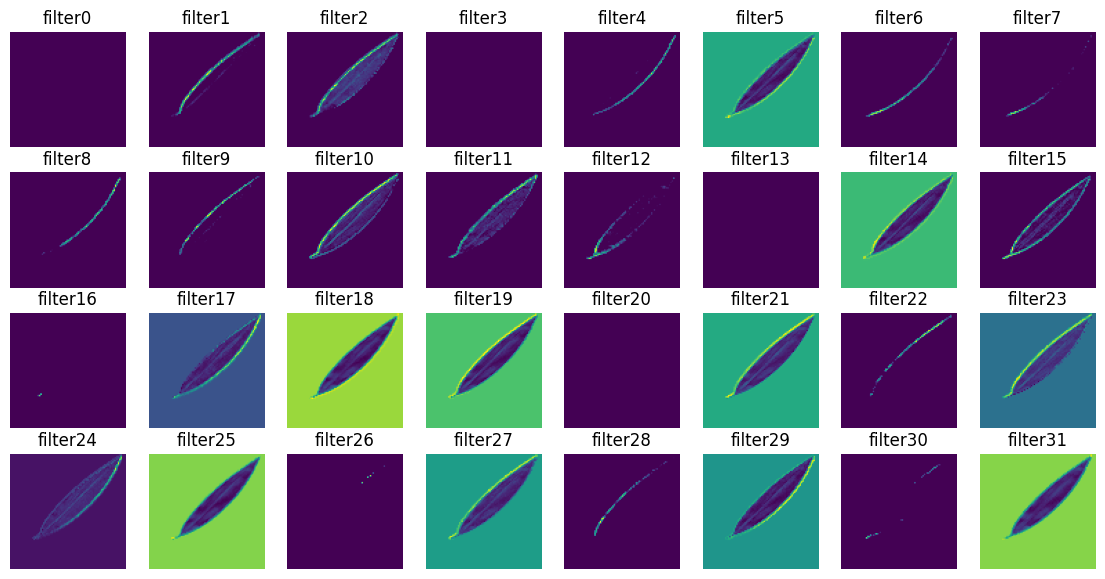

In [14]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

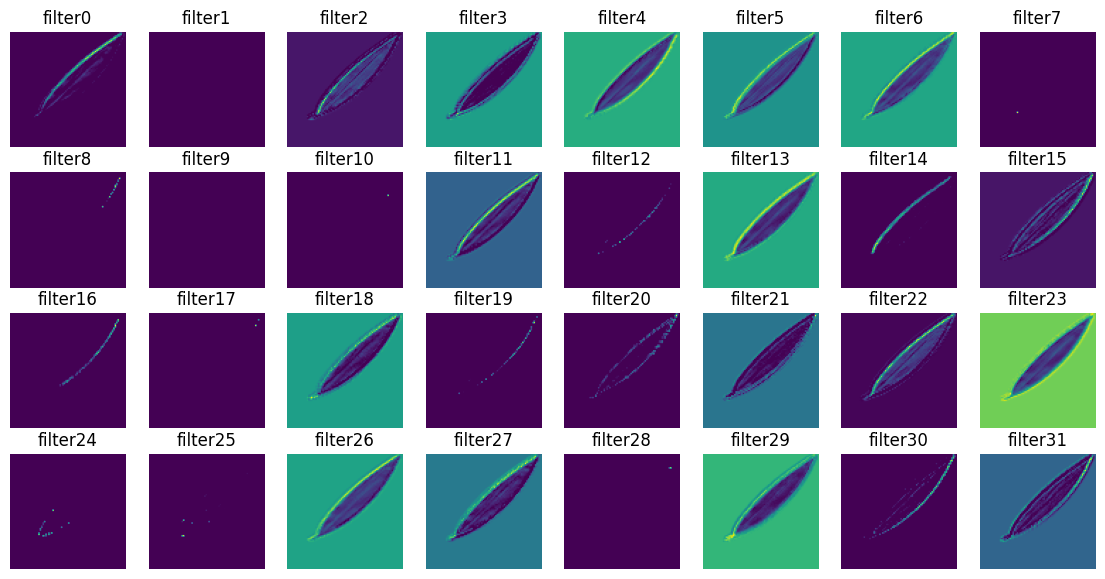

In [15]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

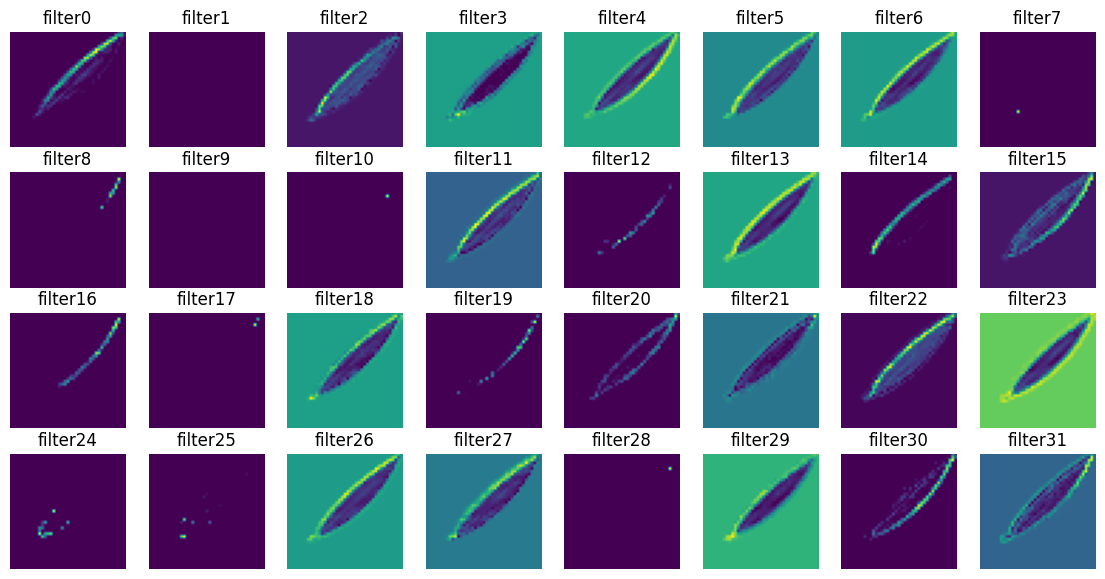

In [16]:
# we can also visualize in color mode.
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i], cmap='viridis') 
plt.show()

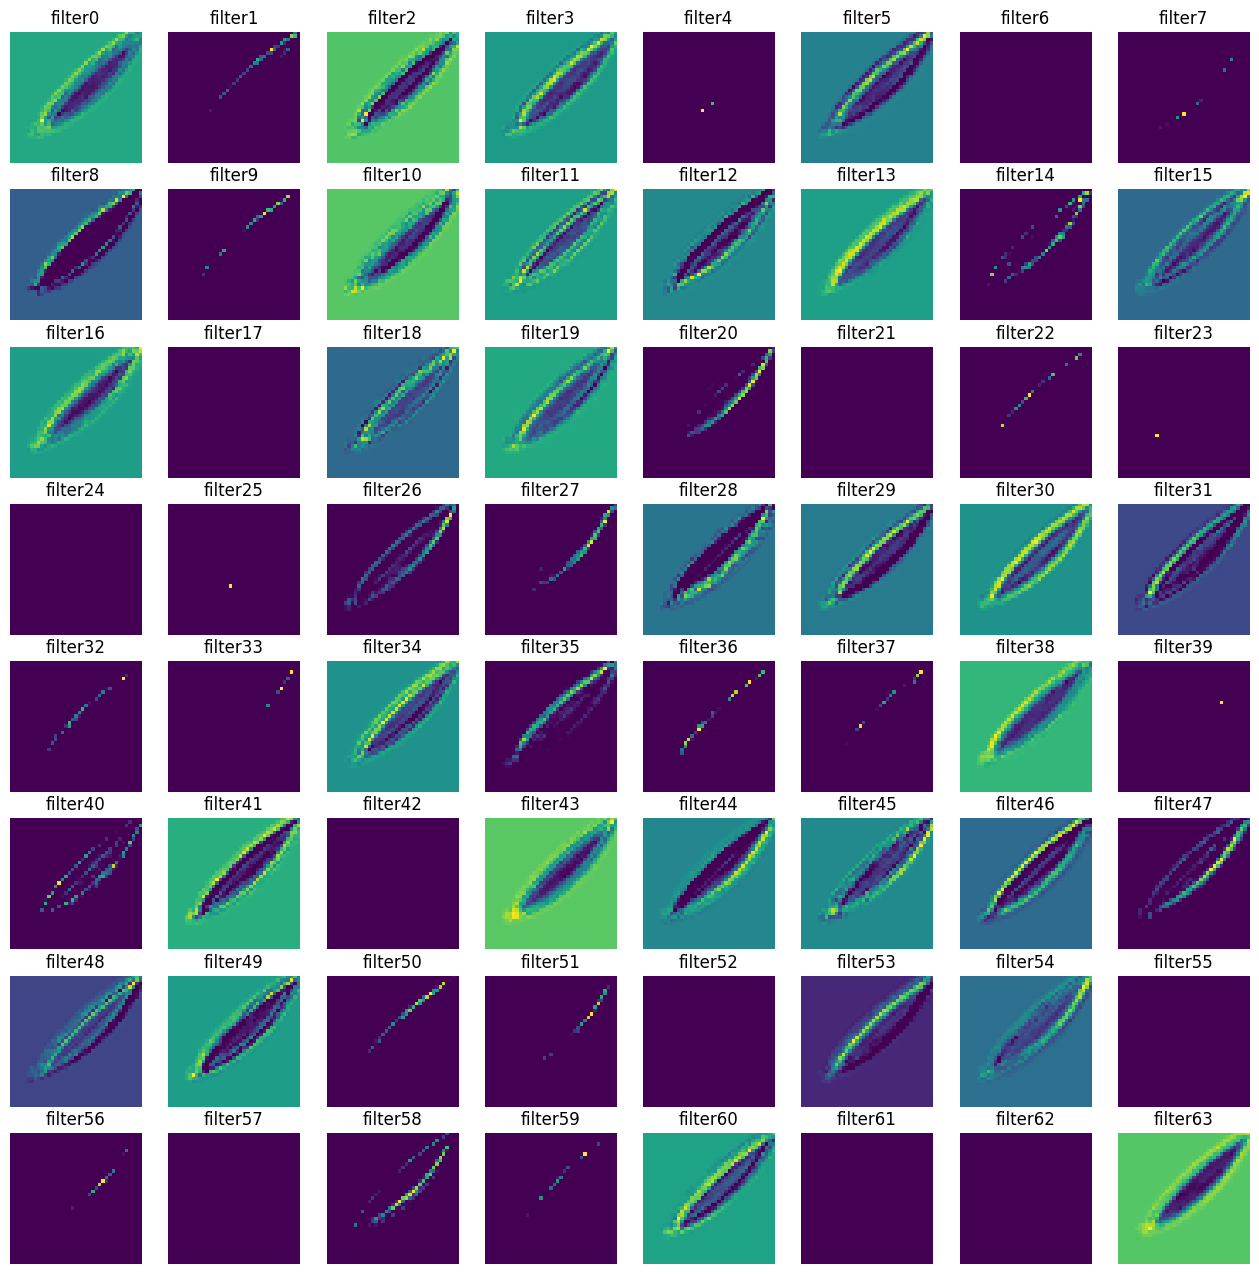

In [17]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(16,16))
columns =8 
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

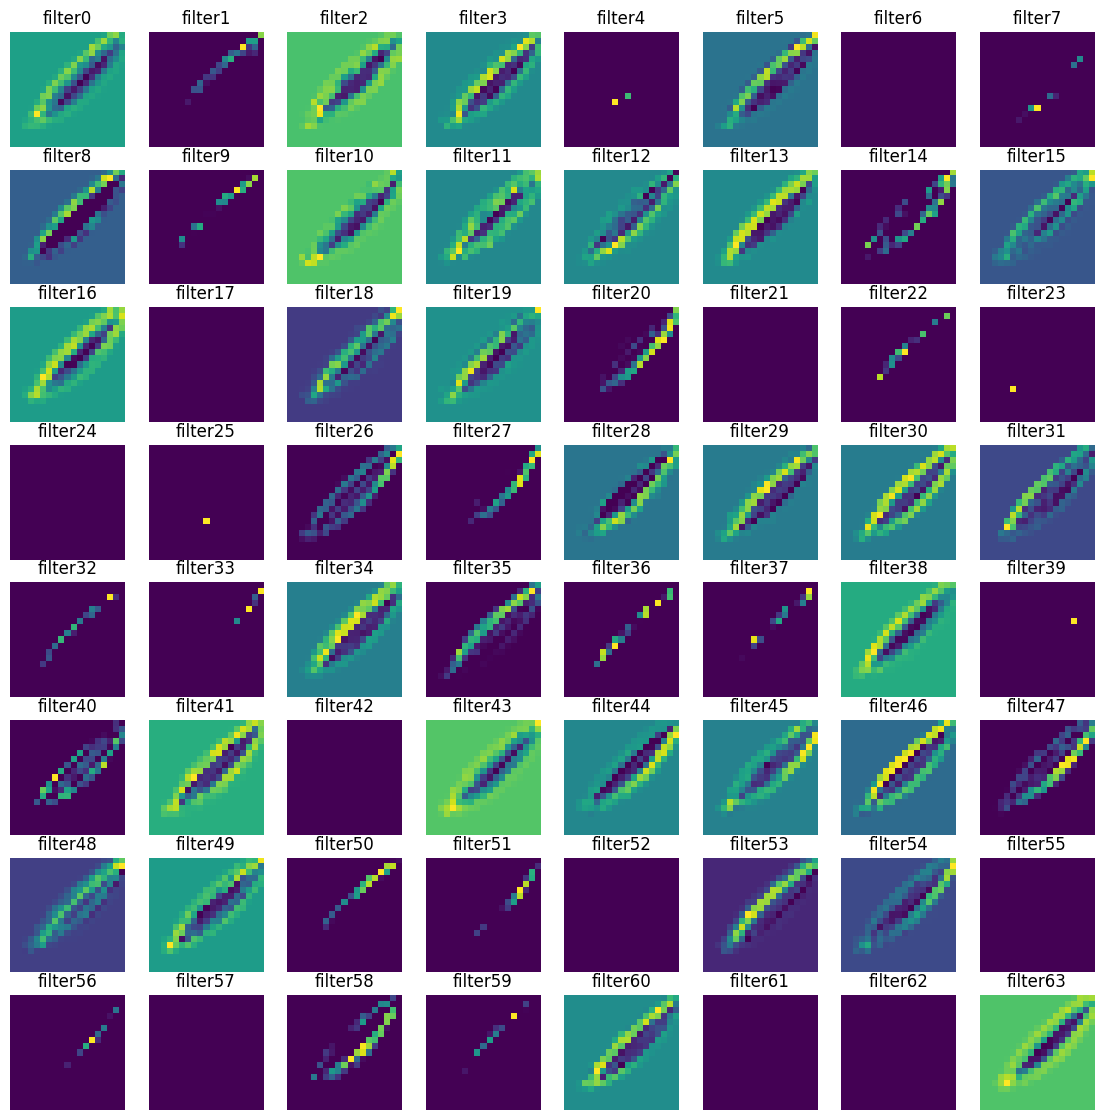

In [18]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_3_features[0, :, :, i],cmap='viridis')
plt.show()

In [19]:
# validation data.
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size) 

Found 228 images belonging to 3 classes.


Epoch 1/75



1/1 [==============================] - 14s 14s/step - loss: 1.0809 - accuracy: 0.4342 - val_loss: 2.6259 - val_accuracy: 0.5351
Epoch 2/75
1/1 [==============================] - 9s 9s/step - loss: 2.7018 - accuracy: 0.5351 - val_loss: 0.9639 - val_accuracy: 0.3553
Epoch 3/75
1/1 [==============================] - 10s 10s/step - loss: 0.9284 - accuracy: 0.5351 - val_loss: 0.9627 - val_accuracy: 0.4386
Epoch 4/75
1/1 [==============================] - 13s 13s/step - loss: 0.9601 - accuracy: 0.4298 - val_loss: 0.8034 - val_accuracy: 0.8465
Epoch 5/75
1/1 [==============================] - 14s 14s/step - loss: 0.8376 - accuracy: 0.6974 - val_loss: 0.6980 - val_accuracy: 0.7368
Epoch 6/75
1/1 [==============================] - 14s 14s/step - loss: 0.7199 - accuracy: 0.7105 - val_loss: 0.5989 - val_accuracy: 0.7456
Epoch 7/75
1/1 [==============================] - 14s 14s/step - loss: 0.6188 - accuracy: 0.7368 - val_loss: 0.4722 - val_accuracy: 0.7588
Epoch 8/75
1/1 [========================

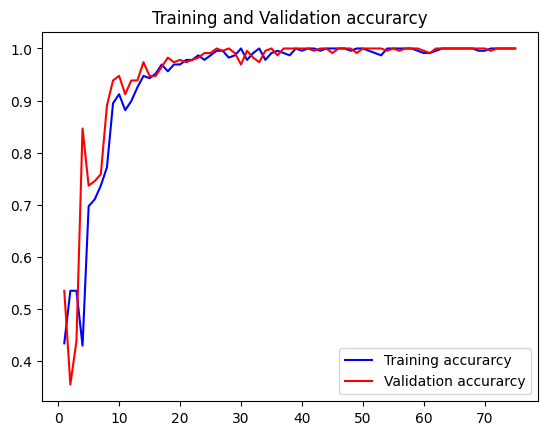

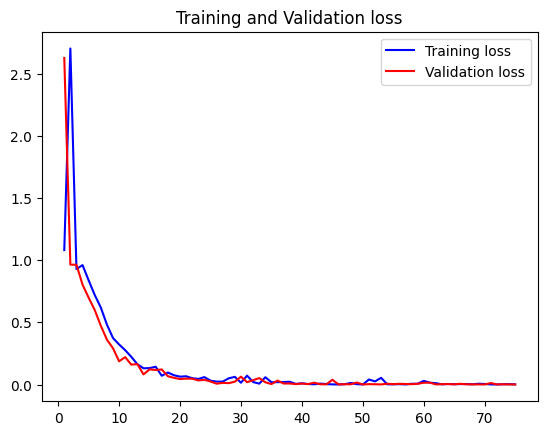

In [23]:
opt = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy',
              metrics=['accuracy'])
steps_per_epoch = max(1, train_generator.samples // batch_size)
validation_steps = max(1, validation_generator.samples // batch_size)

train = model.fit(train_generator,
                  epochs=75,
                  steps_per_epoch=steps_per_epoch,
                  validation_data=validation_generator,
                  validation_steps=validation_steps,
                  verbose=1)



acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


In [24]:
score,accuracy =model.evaluate(test_generator,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

1/1 [==============================] - 2s 2s/step - loss: 1.4659e-05 - accuracy: 1.0000
Test score is 1.4658749023510609e-05
Test accuracy is 1.0


In [25]:
# Save entire model with optimizer, architecture, weights and training configuration.
from keras.models import load_model
model.save('leaf.h5')

In [26]:
# Save model weights.
from keras.models import load_model
model.save_weights('leaf_weights.h5')

In [27]:
# Get classes of model trained on
classes = train_generator.class_indices 
classes


{'Alpinia Galanga (Rasna)': 0,
 'Amaranthus Viridis (Arive-Dantu)': 1,
 'Artocarpus Heterophyllus (Jackfruit)': 2}

In [28]:
# Loading model and predict.
from keras.models import load_model
model=load_model('leaf.h5')

Classes = ['Alpinia Galanga (Rasna)',
           'Amaranthus Viridis (Arive-Dantu)',
           'Artocarpus Heterophyllus (Jackfruit)']


1/1 [==============================] - 0s 79ms/step
Artocarpus Heterophyllus (Jackfruit)


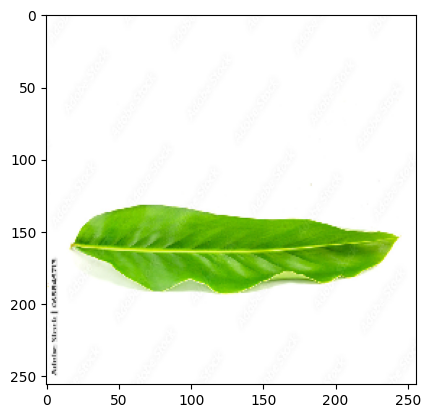

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Pre-Processing test data same as train data.
img_width = 256
img_height = 256


def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x / 255
    return np.expand_dims(x, axis=0)


result = model.predict([prepare("C://Users//rajdi//Downloads//test1_alpinia.jpg")])
predicted_class = np.argmax(result)
disease = image.load_img(
    "C://Users//rajdi//Downloads//test1_alpinia.jpg", target_size=(256, 256))
plt.imshow(disease)
print(Classes[predicted_class])


In [31]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('leaf.h5')

# Convert the Keras model to a TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
open("output.tflite", "wb").write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\rajdi\AppData\Local\Temp\tmp7sgzm0wv\assets


INFO:tensorflow:Assets written to: C:\Users\rajdi\AppData\Local\Temp\tmp7sgzm0wv\assets


47708460